# ANÁLISIS Y PROCESAMIENTO INTELIGENTE DE TEXTOS

## Proyecto final: Analizador de sentimientos de publicaciones en Reddit 🤖

**Profesor:** M.P. Octavio Augusto Sanchez  
**Grupo:** 01

**Alumnos:**
- David
- Wicho
- Javier
- Brenda
- Isra


        - Seleccione el valor de control de procesos con la variable: "ejecuta" para definir el punto de partida

**Opciones de Ejecución:**
1. Ejecutar desde el inicio  
   - Descarga Datos de Reddit y sigue los procesos desde ahí
2. Limpia los datos descargados  
   - Preprocesamiento
3. Entrenamiento de modelo  
   - Tokeniza
   - Segmenta datos de entrenamiento y pruebas
   - Entrena el modelo
4. Análisis y Resultados 

Nota: si es la primer ejecucion al abrir el notebook es necesario ejecutar el estado anterior al estado objetivo



In [223]:
ejecuta = 2

## 1 Conexion a la API de Reddit  
En esta seccion se descargan los datos  


In [224]:
if ejecuta == 1: 
    import praw
    from langdetect import detect
    import pandas as pd
    print("importando librerias")

In [225]:
if ejecuta == 1: 
    # Credenciales de la API de Reddit
    reddit = praw.Reddit(
        client_id="8MLdeP4d-tobayhY1cN3iQ",
        client_secret="XVH7RcaOLYaun1ms4F5C8kMwTOymdQ",
        user_agent="script:Caza Toxicos (by SuperCash9022)"
    )

    # Verificar autenticación
    try:
        reddit.user.me()
        print("Autenticación exitosa")
    except Exception as e:
        print(f"Error durante la autenticación: {e}")
        exit()

    # Lista de subreddits relevantes
    #subreddits = ["Mexico", "politica", "worldnews", "news","presidente"]
    #subreddits = ["Mexico", "mexico", "politica", "worldnews", "news", "gobierno", "EleccionesMéxico2024", "politicaMX", "morena", "PVEM", "PT", "pan", "pri", "prd", "mc", "Giovani Gutiérrez", "Hanna de Lamadrid Téllez", "Sofía Margarita Provencio Odonoghue","2dejunio", "AMLO", "ClaudiaSheinbaum", "Sheinbaum", "XochitlGalvez", "Maynez", "JorgeAlvarezMaynez ", "MORENA", "PRI", "PAN", "PRD", "MC", "PVEM", "PT", "GiovaniGutierrez", "HannaLamadrid", "SofiaProvencio", "Elecciones2024", "EleccionesMéxico2024", "EleccionesMéxico", "Elecciones2024México"]

    
    query = "política", "politicaMX","elecciones" 

    subreddits = ["Mexico", "mexico", "politica", "worldnews", "news", "coyoacan","gobierno", "EleccionesMéxico2024", "politicaMX", "morena", "PVEM", "PT", "pan", "pri", "prd", "mc", "Giovani Gutiérrez", "Hanna de Lamadrid Téllez", "Sofía Margarita Provencio Odonoghue","2dejunio"]
 
    posts = []
    try:
        for subreddit_name in subreddits:
            subreddit = reddit.subreddit(subreddit_name) 
            for post in subreddit.search(query, limit=10000):  # Ajustar sort a "new" para obtener posts recientes
                # Detectar el idioma del post
                try:
                    if detect(post.title + " " + post.selftext) == 'es': 
                        posts.append(post.title + "\n" + post.selftext)
                        print(f"Post: {post.title[:50]}")  # Mostrar los primeros 50 caracteres del título
                except:
                    # En caso de que no se pueda detectar el idioma, ignorar el post
                    continue
    except Exception as e:
        print(f"Error durante la recolección de posts: {e}")

    # Convertir los posts en un DataFrame y añadir una columna 'label' vacía para su posterior clasificación manual
    df_posts = pd.DataFrame(posts, columns=["post"])
    df_posts['label'] = ""

    # Guardar el DataFrame en un archivo CSV
    df_posts.to_csv('datos_reddit.csv', index=False, encoding='utf-8')

    # Guardar los posts en un archivo para su posterior análisis
    try:
        with open('reddit_posts.txt', 'w', encoding='utf-8') as f:
            for post in posts:
                f.write("%s\n\n" % post)
        print("Posts guardados en 'reddit_post.txt'.") # ------------------------------------- Se guardan en un archivo de texto
    except Exception as e:
        print(f"Error al guardar los posts: {e}")

In [226]:
df_posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   post    452 non-null    object
 1   label   452 non-null    object
 2   manual  452 non-null    object
dtypes: object(3)
memory usage: 10.7+ KB


In [227]:
def eliminar_repetidos(lista):
    """Elimina elementos repetidos de una lista.
    
    Args:
        lista (list): La lista original con posibles elementos repetidos.
    
    Returns:
        list: Una nueva lista con elementos únicos.
    """
    elementos_unicos = []
    elementos_vistos = set()
    
    for elemento in lista:
        if elemento not in elementos_vistos:
            elementos_unicos.append(elemento)
            elementos_vistos.add(elemento)
    
    return elementos_unicos

# Ejemplo de uso
palabras_molesto = [
    'contento', 'contenta', 'feliz', 'alegre', 'satisfecho', 'satisfecha', 'eufórico', 'eufórica', 
    'entusiasmado', 'entusiasmada', 'radiante', 'gozoso', 'gozosa', 'encantado', 'encantada', 
    'jubiloso', 'jubilosa', 'optimista', 'animado', 'animada', 'exultante', 'bienhumorado', 
    'bienhumorada', 'dichoso', 'dichosa', 'agradecido', 'agradecida', 'emocionado', 'emocionada', 
    'rejuvenecido', 'rejuvenecida', 'alegría', 'placer', 'regocijo', 'felicidad', 'júbilo', 
    'entusiasmo', 'satisfacción', 'contentamiento', 'éxtasis', 'deleite', 'encanto', 'gratitud', 'eufórico', 'eufórica', 'jovial', 'jovial', 'animado', 'animada', 'alegre', 'alegría', 
    'contento', 'contenta', 'risueño', 'risueña', 'satisfecho', 'satisfecha', 'optimista', 
    'extasiado', 'extasiada', 'jubiloso', 'jubilosa', 'dichoso', 'dichosa', 'agradecido', 
    'agradecida', 'emocionado', 'emocionada', 'feliz', 'contento', 'contenta', 'exultante', 
    'alegre', 'bienhumorado', 'bienhumorada', 'gozoso', 'gozosa', 'placentero', 'placentera', 
    'regocijado', 'regocijada', 'encantado', 'encantada', 'deleitante', 'felicidad', 'júbilo', 
    'entusiasmo', 'optimista', 'satisfacción', 'encantado', 'encantada',
    'radiante', 'radiante', 'jubiloso', 'jubilosa', 'risueño', 'risueña', 'efusivo', 'efusiva', 
    'encantado', 'encantada', 'agradecido', 'agradecida', 'contento', 'contenta', 'entusiasta', 
    'entusiasta', 'regocijado', 'regocijada', 'optimista', 'optimista', 'alegre', 'alegre', 
    'feliz', 'feliz', 'extático', 'extática', 'emocionado', 'emocionada', 'satisfecho', 
    'satisfecha', 'gozoso', 'gozosa', 'radiante', 'radiante', 'exultante', 'exultante', 
    'jubiloso', 'jubilosa', 'eufórico', 'eufórica', 'contento', 'contenta', 'entusiasta', 
    'entusiasta', 'risueño', 'risueña', 'alegre', 'alegre', 'encantado', 'encantada', 'feliz', 
    'feliz', 'entusiasta', 'entusiasta', 'contento', 'contenta', 'exultante', 'exultante', 
    'jubiloso', 'jubilosa', 'dichoso', 'dichosa', 'agradecido', 'agradecida', 'emocionado',
]

lista_palabras_molesto = eliminar_repetidos(palabras_molesto)
print(lista_palabras_molesto)

['contento', 'contenta', 'feliz', 'alegre', 'satisfecho', 'satisfecha', 'eufórico', 'eufórica', 'entusiasmado', 'entusiasmada', 'radiante', 'gozoso', 'gozosa', 'encantado', 'encantada', 'jubiloso', 'jubilosa', 'optimista', 'animado', 'animada', 'exultante', 'bienhumorado', 'bienhumorada', 'dichoso', 'dichosa', 'agradecido', 'agradecida', 'emocionado', 'emocionada', 'rejuvenecido', 'rejuvenecida', 'alegría', 'placer', 'regocijo', 'felicidad', 'júbilo', 'entusiasmo', 'satisfacción', 'contentamiento', 'éxtasis', 'deleite', 'encanto', 'gratitud', 'jovial', 'risueño', 'risueña', 'extasiado', 'extasiada', 'placentero', 'placentera', 'regocijado', 'regocijada', 'deleitante', 'efusivo', 'efusiva', 'entusiasta', 'extático', 'extática']


In [228]:
if ejecuta == 1: 
    # Convertir los posts en un DataFrame y añadir una columna 'label' vacía para su posterior clasificación manual
    df_posts = pd.DataFrame(posts, columns=["post"])
    df_posts['label'] = ""
    df_posts['manual'] = ""

    palabras_molesto = [
    'enojado', 'enojada', 'molesto', 'molesta', 'irritado', 'irritada', 'enfurecido', 'enfurecida', 
    'indignado', 'indignada', 'furioso', 'furiosa', 'cabreado', 'cabreada', 'fastidiado', 'fastidiada', 
    'rabia', 'enojo', 'furia', 'desquiciado', 'desquiciada', 'irritación', 'colérico', 'colérica', 
    'resentido', 'resentida', 'ofendido', 'ofendida', 'frustrado', 'frustrada', 'disgustado', 'disgustada', 
    'ulcerado', 'ulcerada', 'cabreo', 'bronca', 'irascible', 'violento', 'violenta', 'airado', 'airada', 
    'enervado', 'enervada', 'resentimiento', 'odioso', 'odiosa', 'amargado', 'amargada', 'enfadado', 
    'enfadada', 'malhumorado', 'malhumorada', 'iracundo', 'iracunda', 'rabioso', 'rabiosa', 'enfurruñado', 
    'enfurruñada', 'agrio', 'agria', 'antipático', 'antipática', 'enfogonado', 'enfogonada', 'irritante', 
    'hostil', 'beligerante', 'agresivo', 'agresiva', 'áspero', 'áspera', 'descontento', 'descontenta', 
    'gruñón', 'gruñona', 'furibundo', 'furibunda', 'incómodo', 'incómoda', 'tenso', 'tensa', 'ira', 
    'exasperado', 'exasperada', 'agitado', 'agitada', 'irritable', 'pendejo', 'cabrón', 'chingada', 
    'chingado', 'verga', 'puta', 'joto', 'maricón', 'culero', 'cagado', 'mierda', 'pinche', 'pendeja', 
    'jodido', 'chingar', 'pedo', 'chingón', 'chinga tu madre', 'perra', 'coger', 'hijo de puta', 
    'malparido', 'coño', 'cola', 'culo', 'madrazo', 'desgraciado', 'mamón', 'estúpido', 'imbécil', 
    'idiota', 'inútil', 'basura', 'despreciable', 'maldito', 'bastardo', 'prostituta', 'zorra', 'manco', 
    'retrasado', 'tarado', 'retardado', 'insulto', 'ofensa', 'maldición', 'odio', 'idiota', 'estúpido', 
    'imbécil', 'tonto', 'chingar', 'cretino', 'mierda', 'joder', 'cabrón', 'puta', 'huevón', 'tonto', 
    'carajo', 'cagar', 'mamar', 'negro', 'verga', 'chino', 'judío', 'machista', 'feminazi', 'maricón', 
    'lesbiana', 'ateo', 'infiel', 'hereje', 'gay', 'marica', 'matar', 'golpear', 'dañar', 'violar', 
    'golpe', 'puñetazo', 'patada', 'arma', 'cuchillo', 'fodongo', 'voy a encontrarte', 'te voy a destrozar', 
    'odio', 'asco', 'repugnancia', 'repulsión', 'no me importa', 'me da igual', 'me vale', 'basura', 
    'inútil', 'despreciable', 'feminazi', 'snowflake', 'genitalia', 'excrementos', 'fluidos', 'corrupto', 
    'inepto', 'incompetente', 'oportunista', 'mentiroso', 'tramposo', 'hipócrita', 'ladronzuelo', 
    'demagogo', 'charlatán', 'dictador', 'Manipulador', 'egoísta', 'deshonesto', 'despótico', 'ambicioso', 
    'farsante', 'cínico', 'chantajista', 'nepotista', 'clientelista', 'vendido', 'inmoral', 'insensible', 
    'aprovechado', 'patán', 'despreciable', 'traidor', 'tonto útil', 'parásito', 'fantoche', 'tirano', 
    'grosero', 'incapaz', 'ignorante', 'fanfarrón', 'populista', 'injusto', 'desleal', 'mequetrefe', 
    'cobarde', 'prepotente', 'explotador', 'soberbio', 'vendepatria', 'mangante', 'intrigante', 'fanático', 
    'sinvergüenza', 'chayotero', 'fifi', 'rabia', 'envidia', 'resentimiento', 'desprecio', 'rencor', 
    'amargura', 'malicia', 'venganza', 'desdén', 'hostilidad', 'cinismo', 'negatividad', 'agresión', 
    'insulto', 'humillación', 'intolerancia', 'prejuicio', 'discriminación', 'violencia', 'maltrato', 
    'manipulación', 'engaño', 'traición', 'mentira', 'hipocresía', 'falsedad', 'toxicidad', 'veneno', 
    'perversión', 'enredo', 'conflicto', 'caos', 'dolor', 'sufrimiento', 'desesperación', 'depresión', 
    'ansiedad', 'angustia', 'desesperanza', 'desaliento', 'desánimo', 'desilusión', 'desgano', 'desinterés', 
    'apatía', 'desapego', 'indiferencia', 'aislamiento', 'soledad', 'bastardo', 'zorra', 'puto', 'tarado', 
    'pendejada', 'inche', 'huevón', 'carajo', 'coño', 'cagar', 'mamar', 'follar', 'negro', 'verga', 
    'chino', 'judío', 'machista', 'feminazi', 'maricón', 'lesbiana', 'ateo', 'infiel', 'hereje', 'gay', 
    'marica', 'matar', 'golpear', 'dañar', 'violar', 'golpe', 'puñetazo', 'patada', 'arma', 'cuchillo', 
    'fodongo', 'voy a encontrarte', 'te voy a destrozar', 'odio', 'asco', 'repugnancia', 'repulsión', 
    'abanto', 'abrazafarolas', 'adufe', 'alcornoque', 'alfeñique', 'andurriasmo', 'arrastracueros', 
    'artabán', 'Atarre', 'Baboso', 'Barrabás', 'Barriobajero', 'Bebecharcos', 'Bellaco', 'Belloto', 
    'Berzotas', 'Besugo', 'Bobalicón', 'Bocabuzón', 'Bocachancla', 'Bocallanta', 'Boquimuelle', 'Borrico', 
    'Botarate', 'Brasas', 'Cabestro', 'Cabezaalberca', 'Cabezabuque', 'Cachibache', 'Cafre', 'Cagalindes', 
    'Cagarruta', 'Calambuco', 'Calamidad', 'Caldúo', 'Calientahielos', 'Calzamonas', 'Cansalmas', 
    'Cantamañanas', 'Capullo', 'Caracaballo', 'Caracartón', 'Caraculo', 'Caraflema', 'Carajaula', 
    'Carajote', 'Carapapa', 'Carapijo', 'Cazurro', 'Cebollino', 'Cenizo', 'Cenutrio', 'Ceporro', 
    'Cernícalo', 'Charrán', 'Chiquilicuatre', 'Chirimbaina', 'Chupacables', 'Chupasangre', 'Chupóptero', 
    'Cierrabares', 'Cipote', 'Comebolsas', 'Comechapas', 'Comeflores', 'Comestacas', 'Cretino', 
    'Cuerpoescombro', 'Culopollo', 'Descerebrado', 'Desgarracalzas', 'Dondiego', 'Donnadie', 'Echacantos', 
    'Ejarramantas', 'Energúmeno', 'Esbaratabailes']

    palabras_contento = ['contento', 'contenta', 'feliz', 'alegre', 'satisfecho', 'satisfecha', 'eufórico', 'eufórica', 'entusiasmado', 'entusiasmada', 'radiante', 'gozoso', 'gozosa', 'encantado', 'encantada', 'jubiloso', 'jubilosa', 'optimista', 'animado', 'animada', 'exultante', 'bienhumorado', 'bienhumorada', 'dichoso', 'dichosa', 'agradecido', 'agradecida', 'emocionado', 'emocionada', 'rejuvenecido', 'rejuvenecida', 'alegría', 'placer', 'regocijo', 'felicidad', 'júbilo', 'entusiasmo', 'satisfacción', 'contentamiento', 'éxtasis', 'deleite', 'encanto', 'gratitud', 'jovial', 'risueño', 'risueña', 'extasiado', 'extasiada', 'placentero', 'placentera', 'regocijado', 'regocijada', 'deleitante', 'efusivo', 'efusiva', 'entusiasta', 'extático', 'extática' ]
    
    # Revisar cada renglón del DataFrame y asignar la etiqueta correspondiente
    for index, row in df_posts.iterrows():
        if any(palabra in row['post'] for palabra in palabras_molesto):
            df_posts.at[index, 'label'] = 1
        elif any(palabra in row['post'] for palabra in palabras_contento):
            df_posts.at[index, 'label'] = 2
        else:
            df_posts.at[index, 'label'] = 0

 

In [229]:
# Contar registros con cada valor de label
conteo_label_0 = df_posts[df_posts['label'] == 0].shape[0]
conteo_label_1 = df_posts[df_posts['label'] == 1].shape[0]
conteo_label_2 = df_posts[df_posts['label'] == 2].shape[0]

# Mostrar los resultados
print(f'Registros con label 0: {conteo_label_0}')
print(f'Registros con label 1: {conteo_label_1}')
print(f'Registros con label 2: {conteo_label_2}')




Registros con label 0: 378
Registros con label 1: 68
Registros con label 2: 6


In [230]:

ejecuta =1

In [231]:
if ejecuta == 1:
# Guardar el DataFrame en un archivo CSV
    df_posts.to_csv('datos_reddit.csv', index=False, encoding='utf-8')
    # Guardar el DataFrame en un archivo Excel 
    df_posts.to_excel('datos_reddit.xlsx', index=False)

In [232]:
ejecuta = 2 # Cambiar a 2 para ejecutar el siguiente bloque de código

## 2 Limpieza de los datos

lectura de los datos clasificados manualmente para su posterior entrenamiento


In [233]:
if ejecuta == 2:
    df_etiquetado = pd.read_csv("datos_reddit_classificacion_manual.csv", encoding='utf-8')
    df_etiquetado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   post    399 non-null    object 
 1   label   226 non-null    float64
 2   manual  399 non-null    object 
dtypes: float64(1), object(2)
memory usage: 9.6+ KB


In [234]:
if ejecuta == 2:
    df_etiquetado.head()

In [235]:
if ejecuta == 2:
    # Contar registros con cada valor de label
    conteo_molesto = df_etiquetado[df_etiquetado['manual'] == "molesto"].shape[0]
    conteo_neutro = df_etiquetado[df_etiquetado['manual'] == "neutro"].shape[0] 

    # Mostrar los resultados
    print(f'Registros molesto: {conteo_molesto}')
    print(f'Registros neutro: {conteo_neutro}') 

Registros molesto: 246
Registros neutro: 153


In [236]:
if ejecuta == 2:
    #agregando 100 registros neutros
    df_neutro = df_posts[df_posts['label'] == 0].head(100)
    df_neutro.head()


In [237]:
if ejecuta == 2:
    df_etiquetado = pd.concat([df_etiquetado, df_neutro])
    df_etiquetado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505 entries, 0 to 121
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   post    499 non-null    object
 1   label   326 non-null    object
 2   manual  499 non-null    object
dtypes: object(3)
memory usage: 15.8+ KB


In [238]:
if ejecuta == 2:
    # Crear la nueva columna "label_entrenamiento" basada en la columna "manual"
    df_etiquetado['label_entrenamiento'] = df_etiquetado['manual'].apply(
                                                lambda x: 1 if x == 'molesto' else 0)

    # Contar registros con cada valor de label
    conteo_molesto = df_etiquetado[df_etiquetado['label_entrenamiento'] == 1].shape[0]
    conteo_neutro = df_etiquetado[df_etiquetado['label_entrenamiento'] == 0].shape[0] 

    # Mostrar los resultados
    print(f'Registros molesto: {conteo_molesto}')
    print(f'Registros neutro: {conteo_neutro}') 


Registros molesto: 246
Registros neutro: 259


In [239]:
ejecuta = 2 # Cambiar a 2 para ejecutar el siguiente bloque de código

In [240]:
df_etiquetado.head()

,post,label,manual,label_entrenamiento
0,Banda por quien piensan votar estas elecciones...,1.0,molesto,1
1,Cuáles son sus predicciones para estas eleccio...,0.0,neutro,0
2,Quien ganará las elecciones presidenciales?\nY...,0.0,neutro,0
3,Se aproximan las elecciones y no se por quién ...,0.0,neutro,0
4,¿Que tanto influyen los debates en las eleccio...,0.0,neutro,0


Se logro tener un DF de mas de 500 registros balanceados y con datos corroborados para su posterior limpieza y procesamiento

In [241]:
if ejecuta == 2:
    import re
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords
    import nltk
    from sklearn.feature_extraction.text import TfidfVectorizer
    import pandas as pd

    # Descargar recursos necesarios de nltk
    nltk.download('punkt')
    nltk.download('stopwords')
    print("Recursos descargados para la limpieza de datos")

Recursos descargados para la limpieza de datos


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\IsraCode\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\IsraCode\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [264]:

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_urls(text):
    return re.sub(r'http\S+', '', text)

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

def convert_to_lowercase(text):
    return text.lower()

def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

def remove_stopwords(tokens):
    spanish_stopwords = set(stopwords.words('spanish'))
    filtered_tokens = [word for word in tokens if word not in spanish_stopwords]
    return filtered_tokens

def preprocess_text(text):
    clean_text = remove_special_characters(text)
    clean_text = convert_to_lowercase(clean_text)
    tokens = tokenize_text(clean_text)
    tokens = remove_stopwords(tokens)
    return ' '.join(tokens)

def replace_newline(text): 
    return text.replace('\n', '')

def remove_whitespace(text):
    return text.strip()

def remove_hastags(text): 
    return re.sub("#", "", text)

def remove_punctuation(text): 
    return re.sub('[^A-Za-z]+', ' ', text)

def clean_up_pipeline(sentence):
    if not isinstance(sentence, str):
        return sentence
    cleaning_data = [
        remove_urls,
        remove_special_characters,
        convert_to_lowercase,
        replace_newline,
        remove_whitespace,
        remove_hastags,
        remove_punctuation,
        preprocess_text,
    ]
    for func in cleaning_data:
        sentence = func(sentence)
    return sentence



In [243]:
if ejecuta == 2: 
    
    def clean_recieved_messages(dataframe):
        for i in range(len(dataframe)):
            if pd.notna(dataframe.iloc[i, dataframe.columns.get_loc('post')]):
                dataframe.iloc[i, dataframe.columns.get_loc('post')] = clean_up_pipeline(str(dataframe.iloc[i, dataframe.columns.get_loc('post')]))
        return dataframe

    # Aplicar la función al DataFrame df_etiquetado
    df_etiquetado = clean_recieved_messages(df_etiquetado)


In [244]:
ejecuta = 3 # Cambiar a 3 para ejecutar el siguiente bloque de código

## 3 Entrenamiento Modelo

In [245]:
if ejecuta == 3:
    # Importar librerías necesarias     
    import pandas as pd
    from sklearn.feature_extraction.text import TfidfVectorizer
    import numpy as np 
    from sklearn.model_selection import train_test_split
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [258]:
if ejecuta == 3:
    labels = df_etiquetado.label_entrenamiento
    # Asegurarse de que todos los valores en 'post' sean cadenas
    df_etiquetado['post'] = df_etiquetado['post'].fillna('').astype(str)

    # Definir la variable tfidf
    tfidf = TfidfVectorizer()

    # Calcular las características usando tfidf 
    features = tfidf.fit_transform(df_etiquetado['post']).toarray() 
    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

    # Crear y entrenar el modelo Naive Bayes
    model = MultinomialNB()
    model.fit(X_train, y_train.values.ravel())

    # Realizar predicciones
    y_pred = model.predict(X_test)


In [254]:
ejecuta = 3 # Cambiar a 3 para ejecutar el siguiente bloque de código

In [259]:
print(f'Length of y_test: {len(y_test)}')
print(f'Length of y_pred: {len(y_pred)}')


Length of y_test: 101
Length of y_pred: 101


In [261]:
if ejecuta == 3:
    # Evaluar el modelo
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8415841584158416
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87        59
           1       0.86      0.74      0.79        42

    accuracy                           0.84       101
   macro avg       0.85      0.83      0.83       101
weighted avg       0.84      0.84      0.84       101

Confusion Matrix:
[[54  5]
 [11 31]]


### Interpretación de los Resultados del Modelo

#### Métricas de Evaluación

1. **Accuracy (Precisión)**:
   - **84.15%**: El modelo clasifica correctamente el 84.15% de las muestras.

2. **Informe de Clasificación**:

   - **Clase 0 (Neutro)**:
     - **Precision (Precisión)**: 0.83. El 83% de las muestras clasificadas como Clase 0 son realmente de la Clase 0.
     - **Recall (Sensibilidad)**: 0.92. El modelo identifica correctamente el 92% de las muestras reales de la Clase 0.
     - **F1-Score**: 0.87. Media armónica de la precisión y el recall.
     - **Support**: 59. Número de muestras reales en la Clase 0.

   - **Clase 1 (Molesto)**:
     - **Precision (Precisión)**: 0.86. El 86% de las muestras clasificadas como Clase 1 son realmente de la Clase 1.
     - **Recall (Sensibilidad)**: 0.74. El modelo identifica correctamente el 74% de las muestras reales de la Clase 1.
     - **F1-Score**: 0.79. Media armónica de la precisión y el recall.
     - **Support**: 42. Número de muestras reales en la Clase 1.

   - **Macro Average (Promedio Macro)**:
     - Promedio de las métricas individuales de precisión, recall y F1-score para cada clase, sin considerar el desequilibrio en el número de muestras entre las clases.

   - **Weighted Average (Promedio Ponderado)**:
     - Promedio ponderado de las métricas individuales de precisión, recall y F1-score para cada clase, considerando el desequilibrio en el número de muestras entre las clases.

#### Matriz de Confusión

La matriz de confusión muestra el desempeño del modelo en términos de clasificaciones verdaderas y falsas para cada clase.



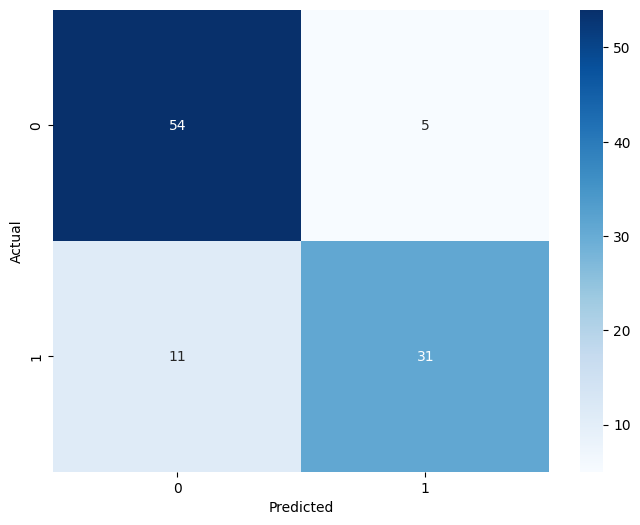

In [263]:
 
import seaborn as sns
import matplotlib.pyplot as plt
if ejecuta == 3:    
    conf_mat = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8,6))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


- **Clase 0 (Neutro)**:
  - **54** muestras correctamente clasificadas (Verdaderos Negativos).
  - **5** muestras incorrectamente clasificadas (Falsos Positivos).

- **Clase 1 (Molesto)**:
  - **11** muestras incorrectamente clasificadas (Falsos Negativos).
  - **31** muestras correctamente clasificadas (Verdaderos Positivos).

#### Visualización de la Matriz de Confusión

El heatmap de la matriz de confusión visualiza las clasificaciones correctas e incorrectas del modelo.

- Los cuadros en diagonal (54 y 31) muestran las clasificaciones correctas.
- Los cuadros fuera de la diagonal (5 y 11) muestran las clasificaciones incorrectas.

### Importancia de las Métricas y la Matriz de Confusión

- **Precisión**: Indica la exactitud de las predicciones positivas del modelo.
- **Recall**: Indica la capacidad del modelo para identificar todas las muestras positivas reales.
- **F1-Score**: Útil cuando hay un desequilibrio en las clases, proporcionando un equilibrio entre precisión y recall.
- **Matriz de Confusión**: Ayuda a entender cómo se distribuyen los errores de clasificación entre las diferentes clases.

En resumen, el modelo tiene un buen desempeño general, pero aún hay espacio para mejorar en la identificación de la Clase 1 (Molesto), como se evidencia por los falsos negativos y falsos positivos en la matriz de confusión.


In [271]:
texts = [
        "Cualquier candidatx es un corruptx, me molesta que no tengamos mejores opciones",
        "ya saben por quien votar? estas son mis primeras elecciones que nervios",
        "como puede ser que el los del PRIAN sigan robando, hay que sacarlos",
        "ya es hora de votar para que corran a los gringos gentrificadores, estoy harto de tener que mudarme cada año por los precios de renta",
        "que padre que esten regalando cafe por ir a votar, quien jala por un cafe despues de votar? jaja"
        ]

def prueba_clasificacion_modelo_one(tfidf, model, texts):
    # Limpiar cada uno de los textos
    for i in range(len(texts)):   
        texts[i] = clean_up_pipeline(texts[i])

    # Transformar los textos a características tfidf
    text_features = tfidf.transform(texts)
    # Predecir las etiquetas para los nuevos textos
    predictions = model.predict(text_features)
    for text, predicted in zip(texts, predictions):
        print('\n"{}"'.format(text))
        if predicted == 0:
            print("  - Se predijo como:\t 'neutro'")
        elif predicted == 1:
            print("  - Se predijo como:\t 'molesto'") 

# Probar el modelo con los nuevos textos
prueba_clasificacion_modelo_one(tfidf, model, texts)



"cualquier candidatx corruptx molesta mejores opciones"
  - Se predijo como:	 'molesto'

"saben votar primeras elecciones nervios"
  - Se predijo como:	 'neutro'

"puede ser prian sigan robando sacarlos"
  - Se predijo como:	 'molesto'

"hora votar corran gringos gentrificadores harto tener mudarme cada ao precios renta"
  - Se predijo como:	 'molesto'

"padre esten regalando cafe ir votar jala cafe despues votar jaja"
  - Se predijo como:	 'neutro'


## 4 Analisis de y Resultados

Época 1, Precisión: 0.8415841584158416
Época 2, Precisión: 0.8316831683168316
Época 3, Precisión: 0.8316831683168316
Época 4, Precisión: 0.8415841584158416
Época 5, Precisión: 0.8316831683168316
Época 6, Precisión: 0.8316831683168316
Época 7, Precisión: 0.8316831683168316
Época 8, Precisión: 0.8217821782178217
Época 9, Precisión: 0.8217821782178217
Época 10, Precisión: 0.8217821782178217


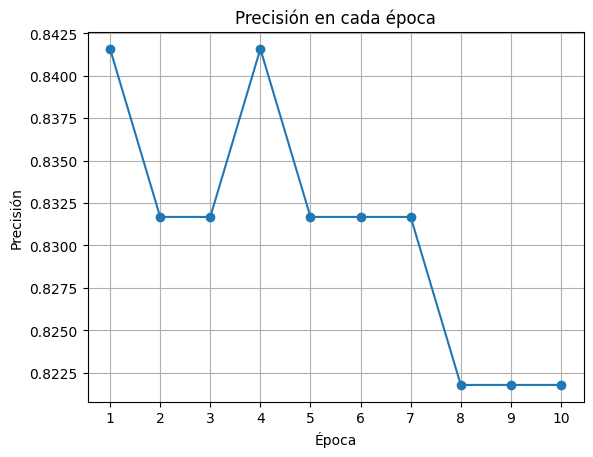

In [249]:
if ejecuta == 4:
    import numpy as np
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.metrics import accuracy_score
    import matplotlib.pyplot as plt

    # Crear y entrenar el modelo Naive Bayes
    model = MultinomialNB()
    epocas=10

    # Lista para guardar la precisión en cada época
    accuracy_list = []

    # Entrenar el modelo durante 5 épocas
    for epoch in range(epocas):
        model.partial_fit(X_train, y_train.values.ravel(), classes=np.unique(y_train))
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_list.append(accuracy)
        print(f"Época {epoch + 1}, Precisión: {accuracy}")

    # Graficar la precisión en cada época
    plt.plot(range(1, epocas+1), accuracy_list, marker='o')
    plt.title('Precisión en cada época')
    plt.xlabel('Época')
    plt.ylabel('Precisión')
    plt.xticks(range(1, epocas+1))
    plt.grid(True)
    plt.show()


Interpretacion de los datos

Epoch 1/7


c:\Users\IsraCode\Documents\FI\2024-2\textos\venv_sentimientos\sentimientos\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4483 - loss: 0.6956 - val_accuracy: 0.3675 - val_loss: 0.6981
Epoch 2/7
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4928 - loss: 0.6933 - val_accuracy: 0.2229 - val_loss: 0.7028
Epoch 3/7
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5220 - loss: 0.6908 - val_accuracy: 0.1928 - val_loss: 0.7089
Epoch 4/7
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5199 - loss: 0.6905 - val_accuracy: 0.1867 - val_loss: 0.7152
Epoch 5/7
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5466 - loss: 0.6885 - val_accuracy: 0.1867 - val_loss: 0.7247
Epoch 6/7
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5485 - loss: 0.6865 - val_accuracy: 0.1867 - val_loss: 0.7364
Epoch 7/7
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5427 - loss: 0.6835 - val_accuracy: 0.1807 - val_loss: 0.7513
Precisión final en el conjunto de prueba: 0.1807228922843933


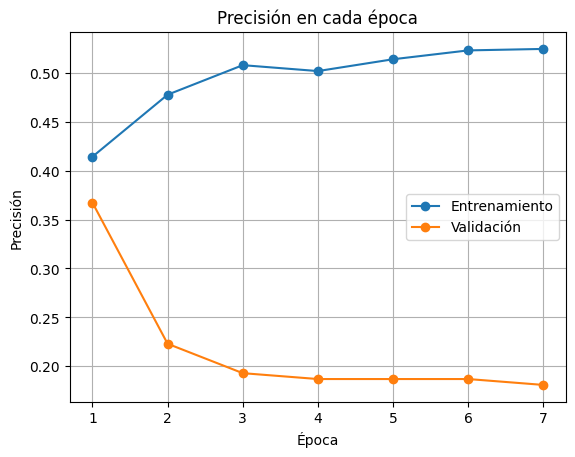

In [250]:
if ejecuta == 4:    
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    import matplotlib.pyplot as plt
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense

    epocas=7

    # Cargar los datos preprocesados y las etiquetas
    tfidf_df = pd.read_csv('tfidf_features.csv')
    labels_df = pd.read_csv('labels.csv')

    # Verificar la cantidad de filas en ambos DataFrames
    num_filas_tfidf = len(tfidf_df)
    num_filas_labels = len(labels_df)
    #print(f"Number of rows in tfidf_df: {num_filas_tfidf}")
    #print(f"Number of rows in labels_df: {num_filas_labels}")

    # Recortar tfidf_df si tiene más filas que labels_df
    if num_filas_tfidf > num_filas_labels:
        tfidf_df = tfidf_df.iloc[:num_filas_labels]
    elif num_filas_labels > num_filas_tfidf:
        labels_df = labels_df.iloc[:num_filas_tfidf]

    # Verificar que el número de muestras y etiquetas coincida
    assert len(tfidf_df) == len(labels_df), "El número de muestras y etiquetas no coincide"

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(tfidf_df, labels_df, test_size=0.2, random_state=42)

    # Crear el modelo de red neuronal
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compilar el modelo
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Entrenar el modelo durante 7 épocas y guardar el historial de entrenamiento
    history = model.fit(X_train, y_train, epochs=epocas, batch_size=32, validation_data=(X_test, y_test), verbose=1)

    # Evaluar el modelo
    accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    print(f"Precisión final en el conjunto de prueba: {accuracy}")

    # Graficar la precisión en cada época
    plt.plot(range(1, epocas+1), history.history['accuracy'], marker='o', label='Entrenamiento')
    plt.plot(range(1, epocas+1), history.history['val_accuracy'], marker='o', label='Validación')
    plt.title('Precisión en cada época')
    plt.xlabel('Época')
    plt.ylabel('Precisión')
    plt.xticks(range(1, epocas+1))
    plt.legend()
    plt.grid(True)
    plt.show()

Interpretacion de los datos